## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 10: Data Cleaning Level Ⅱ- Unpack, restructure, and reformulate the table

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Example 1 – unpacking columns & reformulating the table

In [2]:
# From Chapter 9 Example 1
from os import listdir
FileNames = listdir('Speeches')
speech_df = pd.DataFrame(index=range(len(FileNames)),columns=['File Name','The Content'])
for i,f_name in enumerate(FileNames):
    f = open('Speeches/' + f_name, "r", encoding='utf-8')
    f_content = f.readlines()
    f.close()
    
    speech_df.at[i,'File Name'] = f_name
    speech_df.at[i,'The Content'] = f_content[0]

speech_df.columns = ['FileName','Content']

In [3]:
speech_df

,FileName,Content
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...
1,BemidjiSep18_2020.txt,There's a lot of people. That's great. Thank y...
2,CharlestonFeb28_2020.txt,Thank you. Thank you. Thank you. All I can say...
3,CharlotteMar2_2020.txt,"I want to thank you very much. North Carolina,..."
4,CincinnatiAug1_2019.txt,Thank you all. Thank you very much. Thank you ...
5,ColoradorSpringsFeb20_2020.txt,"Hello Colorado. We love Colorado, most beautif..."
6,DallasOct17_2019.txt,Thank you. Thank you very much. Hello Dallas. ...
7,DesMoinesJan30_2020.txt,I worked so hard for this state. I worked so h...
8,FayettevilleSep19_2020.txt,"What a crowd, what a crowd. Get those people o..."
9,FayettevilleSep9_2019.txt,Thank you everybody. Thank you and Vice Presi...


### Unpacking FileName

In [4]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Oct','Sep','Nov','Dec']
def SeparateCity(v):
    for mon in Months:
        if (mon in v):
            return v[:v.find(mon)]
speech_df['City'] = speech_df.FileName.apply(SeparateCity)

In [5]:
def SeparateDate(r):
    return r.FileName[len(r.City):r.FileName.find('.txt')]

speech_df['Date'] = speech_df.apply(SeparateDate,axis=1)
speech_df.Date = pd.to_datetime(speech_df.Date,format='%b%d_%Y')
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [6]:
def extractDMY(r):
    r['Day'] = r.Date.day
    r['Month'] = r.Date.month
    r['Year'] = r.Date.year
    return r
speech_df = speech_df.apply(extractDMY,axis=1)

In [7]:
speech_df.drop(columns=['FileName'],inplace=True)

In [8]:
speech_df.head()

,Content,City,Date,Day,Month,Year
0,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019
1,There's a lot of people. That's great. Thank y...,Bemidji,2020-09-18,18,9,2020
2,Thank you. Thank you. Thank you. All I can say...,Charleston,2020-02-28,28,2,2020
3,"I want to thank you very much. North Carolina,...",Charlotte,2020-03-02,2,3,2020
4,Thank you all. Thank you very much. Thank you ...,Cincinnati,2019-08-01,1,8,2019


### Unpacking Content

In [9]:
Words = ['vote','tax','campaign','economy']

def FindWordRatio(row):
    total_n_words = len(row.Content.split(' '))
    for w in Words:
        row['r_{}'.format(w)] = row.Content.count(w)/total_n_words
    return row

speech_df = speech_df.apply(FindWordRatio,axis=1)

In [10]:
speech_df.head()

,Content,City,Date,Day,Month,Year,r_vote,r_tax,r_campaign,r_economy
0,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019,0.000561,0.000505,0.000224,0.000617
1,There's a lot of people. That's great. Thank y...,Bemidji,2020-09-18,18,9,2020,0.000710,0.000237,0.000533,0.000000
2,Thank you. Thank you. Thank you. All I can say...,Charleston,2020-02-28,28,2,2020,0.000950,0.000317,0.000106,0.000000
3,"I want to thank you very much. North Carolina,...",Charlotte,2020-03-02,2,3,2020,0.000750,0.001500,0.000150,0.000450
4,Thank you all. Thank you very much. Thank you ...,Cincinnati,2019-08-01,1,8,2019,0.001713,0.000857,0.001224,0.000245


### Reformulate a new table for visualization

In [11]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Oct','Sep','Nov','Dec']
lambda_func = lambda r: '{}_{}'.format(r.Year,Months[r.Month-1])
speech_df['Y_M'] = speech_df.apply(lambda_func,axis=1)

In [12]:
Words = ['vote','tax','campaign','economy']
vis_df = speech_df.pivot_table(
               index= ['Y_M'], 
               values= ['r_{}'.format(w) for w in Words],
               aggfunc= np.mean)

In [13]:
vis_df

,r_campaign,r_economy,r_tax,r_vote
Y_M,,,,
2019_Aug,0.001499,0.000270,0.000872,0.001596
2019_Dec,0.000316,0.000665,0.000558,0.000739
2019_Jul,0.000283,0.000660,0.000660,0.001603
2019_Nov,0.000551,0.000333,0.000385,0.002048
2019_Oct,0.000533,0.000572,0.001340,0.001398
2019_Sep,0.000843,0.000448,0.000419,0.000409
2020_Aug,0.000428,0.000222,0.001189,0.001577
2020_Feb,0.000353,0.000224,0.000625,0.001206
2020_Jan,0.000299,0.000240,0.001331,0.001215


In [14]:
vis_df = pd.DataFrame({
  'r_vote': speech_df.groupby('Y_M').r_vote.mean(),
  'r_tax': speech_df.groupby('Y_M').r_tax.mean(),
  'r_campaign': speech_df.groupby('Y_M').r_campaign.mean(),
  'r_economy': speech_df.groupby('Y_M').r_economy.mean()
})

In [15]:
vis_df

,r_vote,r_tax,r_campaign,r_economy
Y_M,,,,
2019_Aug,0.001596,0.000872,0.001499,0.000270
2019_Dec,0.000739,0.000558,0.000316,0.000665
2019_Jul,0.001603,0.000660,0.000283,0.000660
2019_Nov,0.002048,0.000385,0.000551,0.000333
2019_Oct,0.001398,0.001340,0.000533,0.000572
2019_Sep,0.000409,0.000419,0.000843,0.000448
2020_Aug,0.001577,0.001189,0.000428,0.000222
2020_Feb,0.001206,0.000625,0.000353,0.000224
2020_Jan,0.001215,0.001331,0.000299,0.000240


### The last step: draw the visualization

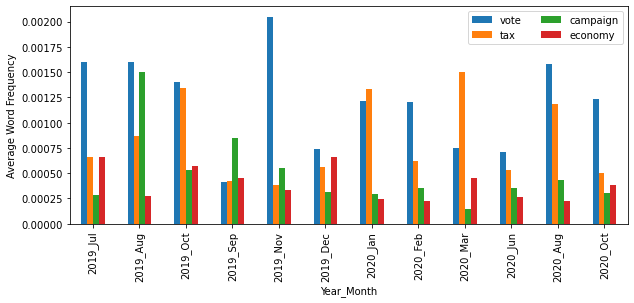

In [16]:
column_order = vis_df.sum().sort_values(ascending=False).index
row_order = speech_df.sort_values('Date').Y_M.unique()

vis_df[column_order].loc[row_order].plot.bar(figsize=(10,4))
plt.legend(['vote','tax','campaign','economy'],ncol=2)
plt.xlabel('Year_Month')
plt.ylabel('Average Word Frequency')
plt.show()

## Example 2 – restructure the table

In [17]:
customer_df = pd.read_csv('Customer Churn.csv')
customer_df.head(1)

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0


In [18]:
customer_df.columns = ['Call_Failure', 'Complains', 'Subscription_Length', 'Seconds_of_Use',
       'Frequency_of_use', 'Frequency_of_SMS', 'Distinct_Called_Numbers',
       'Status', 'Churn']

In [19]:
churn_possibilities = customer_df.Churn.unique()

box_sr = pd.Series('',index = churn_possibilities)

for poss in churn_possibilities:
    BM = customer_df.Churn == poss
    box_sr[poss] = customer_df[BM].Call_Failure.values

In [20]:
print(box_sr)

0    [8, 0, 10, 10, 3, 11, 4, 13, 7, 7, 6, 9, 25, 4...
1    [0, 0, 23, 13, 9, 9, 0, 0, 0, 3, 3, 26, 12, 12...
dtype: object


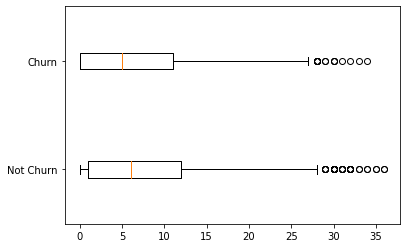

In [21]:
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],['Not Churn','Churn'])
plt.show()

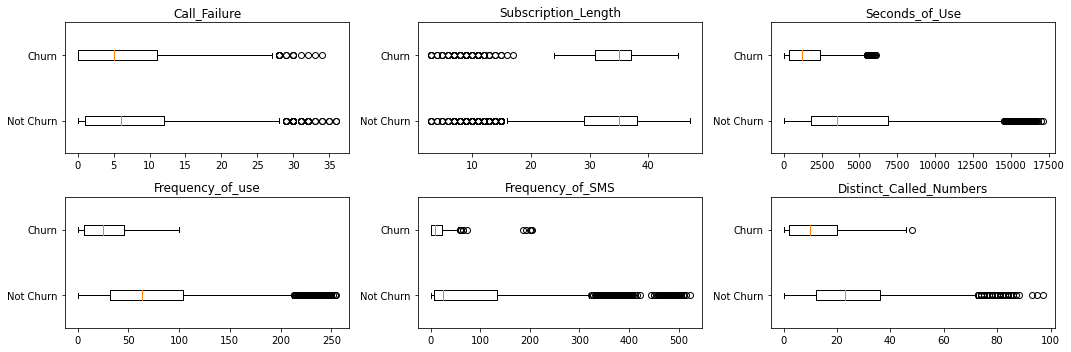

In [22]:
select_columns = ['Call_Failure', 'Subscription_Length', 'Seconds_of_Use',
       'Frequency_of_use', 'Frequency_of_SMS', 'Distinct_Called_Numbers']
churn_possibilities = customer_df.Churn.unique()

plt.figure(figsize=(15,5))
for i,sc in enumerate(select_columns):
    for poss in churn_possibilities:
        BM = customer_df.Churn == poss
        box_sr[poss] = customer_df[BM][sc].values
    plt.subplot(2,3,i+1)
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],['Not Churn','Churn'])
    plt.title(sc)
plt.tight_layout()
plt.show()

## Example 3 – Data Cleaning Level Ⅰ and Ⅱ

In [23]:
month_df = pd.read_csv('Electric_Production.csv')
month_df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


### Level Ⅰ cleaning

In [24]:
month_df.columns = ['Date','Demand']
month_df.set_index(pd.to_datetime(month_df.Date,format='%m/%d/%Y'),inplace=True)
month_df.drop(columns=['Date'],inplace=True)

In [25]:
month_df

,Demand
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


### Level Ⅱ cleaning

In [26]:
attributes_dic={'IA1':'Average demand of the month',
            'IA2':'Slope of change for the demand of the month',
            'IA3': 'Average demands of months t-2, t-3 and t-4',
            'DA': 'Demand of month t'}
predict_df = pd.DataFrame(index=month_df.iloc[24:].index,columns=attributes_dic.keys())

In [27]:
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,NaN,NaN,NaN,NaN
1987-02-01,NaN,NaN,NaN,NaN
1987-03-01,NaN,NaN,NaN,NaN
1987-04-01,NaN,NaN,NaN,NaN
1987-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-09-01,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN


#### Fill out DA

In [28]:
predict_df.DA = month_df.loc['1987-01-01':].Demand
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,NaN,NaN,NaN,73.8152
1987-02-01,NaN,NaN,NaN,70.0620
1987-03-01,NaN,NaN,NaN,65.6100
1987-04-01,NaN,NaN,NaN,60.1586
1987-05-01,NaN,NaN,NaN,58.8734
...,...,...,...,...
2017-09-01,NaN,NaN,NaN,98.6154
2017-10-01,NaN,NaN,NaN,93.6137
2017-11-01,NaN,NaN,NaN,97.3359


#### Fill out IA1

In [29]:
month_df['Month'] = list(map(lambda v:v.month, month_df.index))

In [30]:
month_df

,Demand,Month
Date,,
1985-01-01,72.5052,1
1985-02-01,70.6720,2
1985-03-01,62.4502,3
1985-04-01,57.4714,4
1985-05-01,55.3151,5
...,...,...
2017-09-01,98.6154,9
2017-10-01,93.6137,10
2017-11-01,97.3359,11


In [31]:
def ComputeIA1(r):
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[:-1]
    BM = wdf.Month == row_date.month
    return wdf[BM].Demand.mean()

predict_df.IA1 = predict_df.apply(ComputeIA1,axis=1)

In [32]:
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,72.905450,NaN,NaN,73.8152
1987-02-01,69.329450,NaN,NaN,70.0620
1987-03-01,62.336150,NaN,NaN,65.6100
1987-04-01,57.252150,NaN,NaN,60.1586
1987-05-01,55.564400,NaN,NaN,58.8734
...,...,...,...,...
2017-09-01,86.105297,NaN,NaN,98.6154
2017-10-01,79.790228,NaN,NaN,93.6137
2017-11-01,82.692128,NaN,NaN,97.3359


#### Fill out IA2

In [33]:
from sklearn.linear_model import LinearRegression
def ComputeIA2(r):
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[:-1]
    BM = wdf.Month == row_date.month
    wdf = wdf[BM]
    wdf.reset_index(drop=True,inplace=True)
    wdf.drop(columns = ['Month'],inplace=True)
    wdf['integer'] = range(len(wdf))
    wdf['ones'] = 1

    lm = LinearRegression()
    lm.fit(wdf.drop(columns=['Demand']), wdf.Demand)
    return lm.coef_[0]

predict_df.IA2 = predict_df.apply(ComputeIA2,axis=1)

In [34]:
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,72.905450,0.800500,NaN,73.8152
1987-02-01,69.329450,-2.685100,NaN,70.0620
1987-03-01,62.336150,-0.228100,NaN,65.6100
1987-04-01,57.252150,-0.438500,NaN,60.1586
1987-05-01,55.564400,0.498600,NaN,58.8734
...,...,...,...,...
2017-09-01,86.105297,1.378406,NaN,98.6154
2017-10-01,79.790228,1.185773,NaN,93.6137
2017-11-01,82.692128,1.190510,NaN,97.3359


Slope = 1.1857728189149566


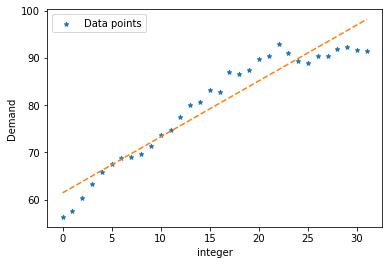

In [35]:
row_date = '2017-10-01'
wdf = month_df.loc[:row_date].iloc[:-1]
BM = wdf.Month == 10
wdf = wdf[BM]
wdf.reset_index(drop=True,inplace=True)
wdf.drop(columns = ['Month'],inplace=True)
wdf['integer'] = range(len(wdf))
wdf['ones'] = 1

lm = LinearRegression()
lm.fit(wdf.drop(columns=['Demand']), wdf.Demand)
print('Slope = {}'.format(lm.coef_[0]))

wdf.plot.scatter(x='integer',y='Demand',marker='*',
                 label='Data points',c='C0')

b = lm.intercept_
a = lm.coef_[0]

X = wdf.integer
y = b + a*X

plt.plot(X,y,label = 'Fitted regression',linestyle='--',c='C1')
plt.show()

#### Fill out IA3

In [36]:
def ComputeIA3(r):
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[-5:-2]
    return wdf.Demand.mean()

predict_df.IA3 = predict_df.apply(ComputeIA3,axis=1)

In [37]:
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,72.905450,0.800500,59.291467,73.8152
1987-02-01,69.329450,-2.685100,61.669767,70.0620
1987-03-01,62.336150,-0.228100,67.097433,65.6100
1987-04-01,57.252150,-0.438500,70.670867,60.1586
1987-05-01,55.564400,0.498600,69.829067,58.8734
...,...,...,...,...
2017-09-01,86.105297,1.378406,102.129167,98.6154
2017-10-01,79.790228,1.185773,107.746067,93.6137
2017-11-01,82.692128,1.190510,106.566800,97.3359


### Doing the analytics – Using Linear Regression to create a predictive model

In [38]:
from sklearn.linear_model import LinearRegression

X = predict_df.drop(columns=['DA'])
y = predict_df.DA

lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [39]:
print('intercept (b0) ', lm.intercept_)
coef_names = ['b1','b2','b3']
print(pd.DataFrame({'Predictor': X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': lm.coef_}))

intercept (b0)  -25.752948794014685
  Predictor coefficient Name  coefficient Value
0       IA1               b1           1.295225
1       IA2               b2           1.436991
2       IA3               b3           0.151708


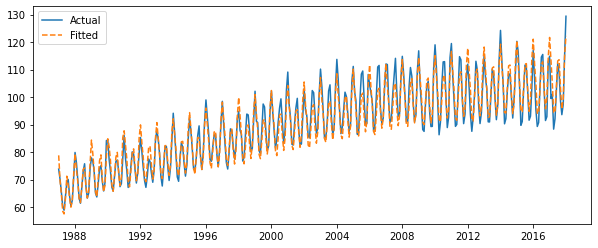

In [40]:
plt.figure(figsize=(10,4))
plt.plot(X.index,y, label='Actual')
plt.plot(X.index,lm.predict(X), 
         label = 'Fitted',linestyle='--')
plt.legend()
plt.show()